In [17]:
import numpy as np                           # For using numerical computations in numpy array
import matplotlib.pyplot as plt              # For visualization
from scipy import spatial                    # For calculating euclidean distance 
from sklearn.manifold import TSNE            # For visualizing word embeddings in 2D by transforming it

import warnings
warnings.simplefilter("ignore")              # For filtering warnings

In [2]:
embed_dict = dict()     # Dictionary to contain word and associated vector

We will be using pre-trained word vectors available from standford nlp website.<br> Link:
https://nlp.stanford.edu/projects/glove/

I have already downloaded it in my system, so I will use that file.

In [6]:
with open("C:/Users/Admin/Desktop/Quant/Datasets/New folder/glove.6B.200d.txt","r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embed_dict[word] = vector

In [19]:
def find_similar_word(embeds):
    "Function to calculate similarty between words"
    nearest = sorted(embed_dict.keys(), key=lambda word: spatial.distance.euclidean(embed_dict[word], embeds))
    return nearest

In [11]:
find_similar_word(embed_dict['river'])[0:10]

['river',
 'rivers',
 'tributary',
 'confluence',
 'creek',
 'along',
 'tributaries',
 'valley',
 'flows',
 'danube']

We get 10 most similar words to word **"river"**. 

In [14]:
find_similar_word(embed_dict['king'])[0:10]

['king',
 'prince',
 'queen',
 'monarch',
 'kingdom',
 'reign',
 'uncle',
 'throne',
 'ii',
 'nephew']

Now, we will visualize the word embeddings in 2D by transforming it with the help of **TSNE(t-distributed stochastic neighbour embedding)**.

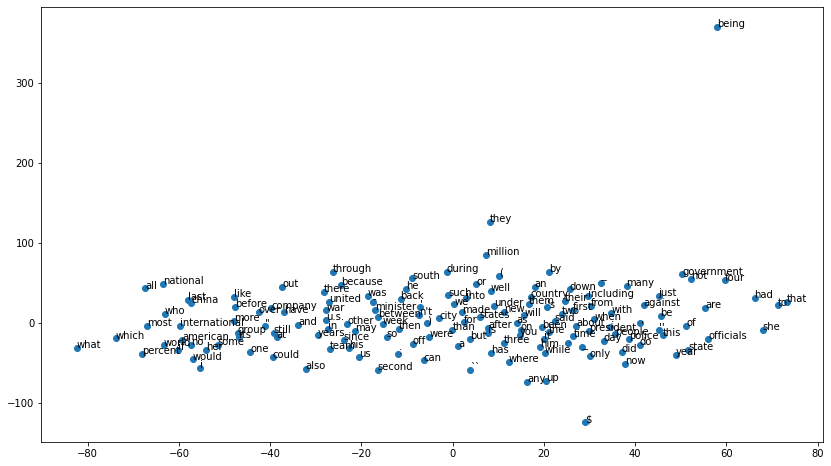

In [18]:
distri = TSNE(n_components=2)
words = list(embed_dict.keys())
vectors = [embed_dict[word] for word in words]
y = distri.fit_transform(vectors[100:250])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
    plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()

We can see word similar in meanings are close to each other. For ex - international, world etc.